# Types

## Distribution of publication types in the dataset

There are 64397 instances of publication type (each entry has one), with just 6 different types of publication types. This number results from the original bibliography's data model, but the labels used below are Zotero's labels. The exception to this rule is that the distinction between monographs and edited volumes is lost in Zotero, which considers both to be books.  

- journalArticle: 26615
- book (monographs and edited volumes): 23083
- bookSection: 13368
- thesis: 1296
- dataset: 34
- webpage: 1

(Visualize as a bubble chart?)

In [4]:
# === Imports === 

import re 
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import join
from os.path import realpath, dirname
import os
from lxml import etree
from io import StringIO, BytesIO
from collections import Counter
import pandas as pd
import numpy as np


# === Files and parameters === 

bibdatafile = join("data", "BIB18_Zotero-RDF.rdf") 
#bibdatafile = join("data", "BIB18_Zotero-RDF_TEST.rdf") 

namespaces = {
    "foaf" : "http://xmlns.com/foaf/0.1/",
    "bib" : "http://purl.org/net/biblio#",
    "dc" : "http://purl.org/dc/elements/1.1/",
    "z" : "http://www.zotero.org/namespaces/export#",
    "rdf" : "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    }

# === Load the dataset === 

bibdata = etree.parse(bibdatafile)

In [5]:
def get_pubtypes(bibdata): 
    # Find all the instances of publication types
    pubtypes = []
    xpath = "//z:itemType/text()"
    pubtypes = bibdata.xpath(xpath, namespaces=namespaces)
    print("There are " + str(len(pubtypes)) +  " instances of publication type in the dataset.")
    return pubtypes


def most_frequent_pubtypes(pubtypes): 
    # Count the occurrences, find the 10 most frequently mentioned persons
    pubtypes_counts = Counter(pubtypes)
    print("There are " + str(len(pubtypes_counts)) + " different publication types in the dataset.")
    pubtypes_counts = dict(sorted(pubtypes_counts.items(), key = lambda item: item[1], reverse=True)[:10])
    columns = ["counts"]
    pubtypes_counts = pd.DataFrame.from_dict(
        pubtypes_counts, 
        orient="index", 
        columns=["count"]).reset_index().rename({"index" : "types"}, 
        axis=1
        )
    return pubtypes_counts


global pubtypes_counts
pubtypes = get_pubtypes(bibdata)
pubtypes_counts = most_frequent_pubtypes(pubtypes)

There are 64397 instances of publication type in the dataset.
There are 6 different publication types in the dataset.


## Visualization

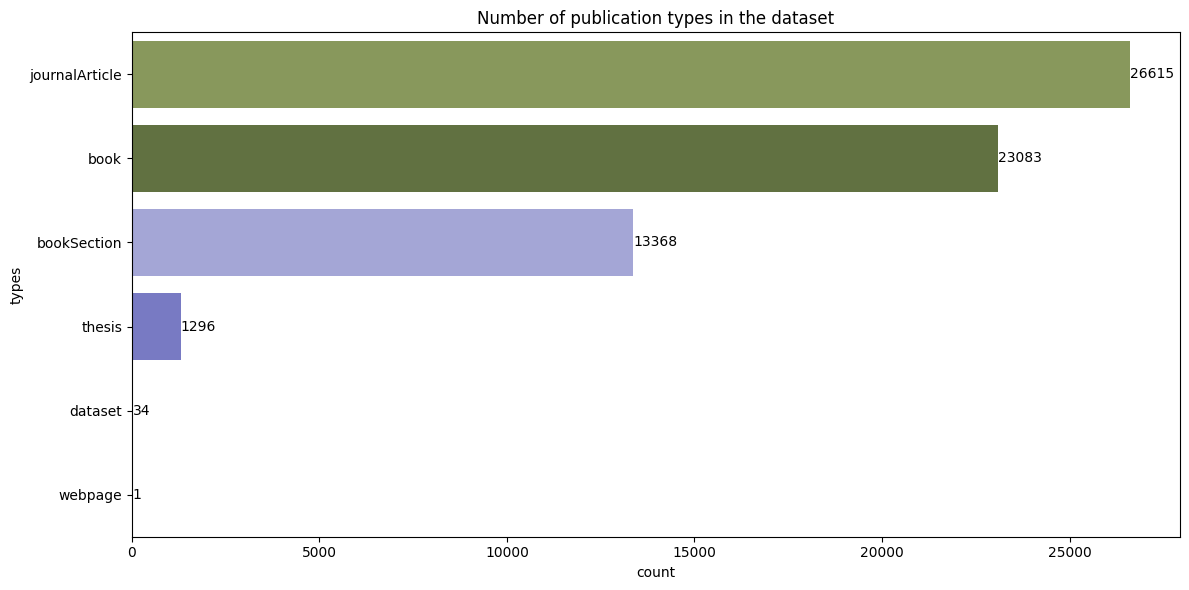

In [9]:
def visualize_pubtypes_counts(pubtypes_counts): 
    #print(pubtypes_counts)
    plt.figure(figsize=(12,6))
    palette = sns.color_palette("tab20b", len(pubtypes_counts))
    fig = sns.barplot(
        data=pubtypes_counts, 
        y = "types", 
        x = "count", 
        hue = "count",
        legend = False,
        orient='h', 
        palette = palette, 
        )
    for i in fig.containers:
        fig.bar_label(i,)
    fig.set(title="Number of publication types in the dataset")
    plt.tight_layout()
    plt.savefig(
        join("figures", "pubtypes_counts.svg"),
        dpi=300
        )
    
visualize_pubtypes_counts(pubtypes_counts)

Note that, unfortunately, Zotero does not distinguish between the item types monograph and edited volume, both being treated as books. (The rule-based disambiguation of these item types, based on the presence of authors and/or editors, is future work.)